In [40]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


### linear regression model to predict Covid cases

In [41]:
df = pd.read_csv(Path('test_sample_data2.csv'))
df

,City,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed_Cases_Per_Day,Deaths,Recovered,Active_Per_Day,Incident_Rate,Case_Fatality_Ratio
0,Abbeville,South Carolina,US,2020-06-09,34.223334,-82.461707,58,0,0.0,58.0,236.474090,0.000000
1,Acadia,Louisiana,US,2020-06-09,30.295065,-92.414197,513,29,0.0,484.0,826.819244,5.653021
2,Accomack,Virginia,US,2020-06-09,37.767072,-75.632346,983,13,0.0,970.0,3041.836861,1.322482
3,Ada,Idaho,US,2020-06-09,43.452658,-116.241552,844,22,0.0,822.0,175.253900,2.606635
4,Adair,Iowa,US,2020-06-09,41.330756,-94.471059,9,0,0.0,9.0,125.838926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11716,NaN,NaN,Tonga,2021-02-02,-21.179000,-175.198200,0,0,0.0,0.0,0.000000,NaN
11717,NaN,NaN,Winter Olympics 2022,2021-02-02,39.904200,116.407400,0,0,0.0,0.0,0.000000,0.000000
11718,NaN,NaN,Antarctica,2021-02-02,-71.949900,23.347000,0,0,0.0,0.0,0.000000,0.000000
11719,NaN,Jersey,United Kingdom,2021-02-02,49.213800,-2.135800,3150,66,0.0,0.0,0.000000,0.000000


In [42]:
len(df)

11721

In [43]:
print(df.dtypes)
print(df.shape)

City                        object
Province_State              object
Country_Region              object
Last_Update                 object
Lat                        float64
Long_                      float64
Confirmed_Cases_Per_Day      int64
Deaths                       int64
Recovered                  float64
Active_Per_Day             float64
Incident_Rate              float64
Case_Fatality_Ratio        float64
dtype: object
(11721, 12)


In [44]:
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df_cat

['City', 'Province_State', 'Country_Region', 'Last_Update']

In [45]:
display(list(df.columns.values))

['City',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed_Cases_Per_Day',
 'Deaths',
 'Recovered',
 'Active_Per_Day',
 'Incident_Rate',
 'Case_Fatality_Ratio']

In [46]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df_cat

['City', 'Province_State', 'Country_Region', 'Last_Update']

In [47]:
#y = df["Confirmed_cases"]
#X = df.drop(columns="Confirmed_cases")

#separate the other attributes from the predicting attribute
#x = df.drop('Confirmed_Cases_Per_Day',axis=1)
#separte the predicting attribute into Y for model training 
#y = ['Confirmed_Cases_Per_Day']


In [48]:
#separate the other attributes from the predicting attribute
x = ['Country_Region']
#separte the predicting attribute into Y for model training 
y = ['Confirmed_Cases_Per_Day']

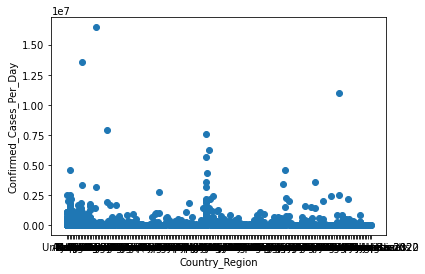

In [49]:
# visually inspect the relationship
plt.scatter(df.Country_Region, df.Confirmed_Cases_Per_Day)
plt.xlabel('Country_Region')
plt.ylabel('Confirmed_Cases_Per_Day')
plt.show()

In [50]:
X = df['Country_Region']
y = df['Confirmed_Cases_Per_Day']

In [51]:
X = df.Country_Region.values.reshape(-1, 1)

In [52]:
X[:5]

array([['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US']], dtype=object)

In [53]:
y.shape

(11721,)

#### Encoding the categorical variables

In [55]:

#Binary encoding using Pandas (multiple columns)
df = pd.get_dummies(df)#=["City", "Province_State","Country_Region" ])
df.head()


,Lat,Long_,Confirmed_Cases_Per_Day,Deaths,Recovered,Active_Per_Day,Incident_Rate,Case_Fatality_Ratio,City_Abbeville,City_Acadia,...,Last_Update_2021-01-08,Last_Update_2021-01-24,Last_Update_2021-02-02,Last_Update_2021-04-02,Last_Update_2021-04-25,Last_Update_2021-07-31,Last_Update_2021-10-10,Last_Update_2021-11-10,Last_Update_2022-01-22,Last_Update_2022-01-25
0,34.223334,-82.461707,58,0,0.0,58.0,236.474090,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
1,30.295065,-92.414197,513,29,0.0,484.0,826.819244,5.653021,0,1,...,0,0,0,0,0,0,0,0,0,0
2,37.767072,-75.632346,983,13,0.0,970.0,3041.836861,1.322482,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43.452658,-116.241552,844,22,0.0,822.0,175.253900,2.606635,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.330756,-94.471059,9,0,0.0,9.0,125.838926,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Give X new value after encoding

In [64]:
X=df.drop(['Confirmed_Cases_Per_Day'], axis=1)
y = df['Confirmed_Cases_Per_Day']

In [67]:
X[:5]

,Lat,Long_,Deaths,Recovered,Active_Per_Day,Incident_Rate,Case_Fatality_Ratio,City_Abbeville,City_Acadia,City_Accomack,...,Last_Update_2021-01-08,Last_Update_2021-01-24,Last_Update_2021-02-02,Last_Update_2021-04-02,Last_Update_2021-04-25,Last_Update_2021-07-31,Last_Update_2021-10-10,Last_Update_2021-11-10,Last_Update_2022-01-22,Last_Update_2022-01-25
0,34.223334,-82.461707,0,0.0,58.0,236.474090,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.295065,-92.414197,29,0.0,484.0,826.819244,5.653021,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,37.767072,-75.632346,13,0.0,970.0,3041.836861,1.322482,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,43.452658,-116.241552,22,0.0,822.0,175.253900,2.606635,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.330756,-94.471059,0,0.0,9.0,125.838926,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y[:5]

0     58
1    513
2    983
3    844
4      9
Name: Confirmed_Cases_Per_Day, dtype: int64

In [68]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [69]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8790, 2743)
(2931, 2743)
(8790,)
(2931,)


In [70]:
#create an instance of the linear regression model.
model = LinearRegression()

In [73]:
#After a model is instantiated, it will analyze the data and attempt to learn patterns in the data. 
# fitting or training:
#model.fit(X, y)

In [63]:
#After the learning stage, the predict() method is used to generate predictions: 
#y_pred = model.predict(X)
#print(y_pred.shape)

In [38]:
#plt.scatter(X, y)
#plt.plot(X, y_pred, color='red')
#plt.show()

In [39]:
#Finally, we can examine the specific parameters of our model: the slope and the y-intercept. 
#The slope is represented by model.coef_, and model.intercept_ is the y-intercept:
#print(model.coef_)
#print(model.intercept_)